<a href="https://colab.research.google.com/github/pravalika-jagadhabi/pravalika_SKMLI261/blob/main/Rapido_Bike_Request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import joblib
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('user uploaded file "(name)" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))


Saving day.csv to day.csv
user uploaded file "(name)" with length 57542 bytes


In [ ]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


<Axes: >

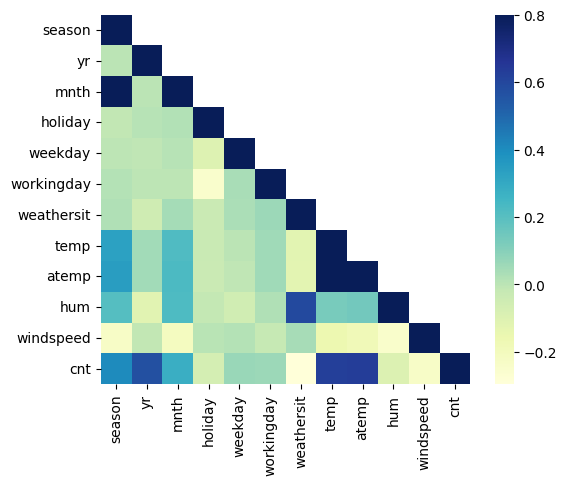

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.drop(['instant','dteday','casual','registered'], axis=1)
varcorr = df.corr()
mask = np.array(varcorr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(varcorr, mask=mask, vmax=0.8, square=True, annot=False,cmap='YlGnBu')

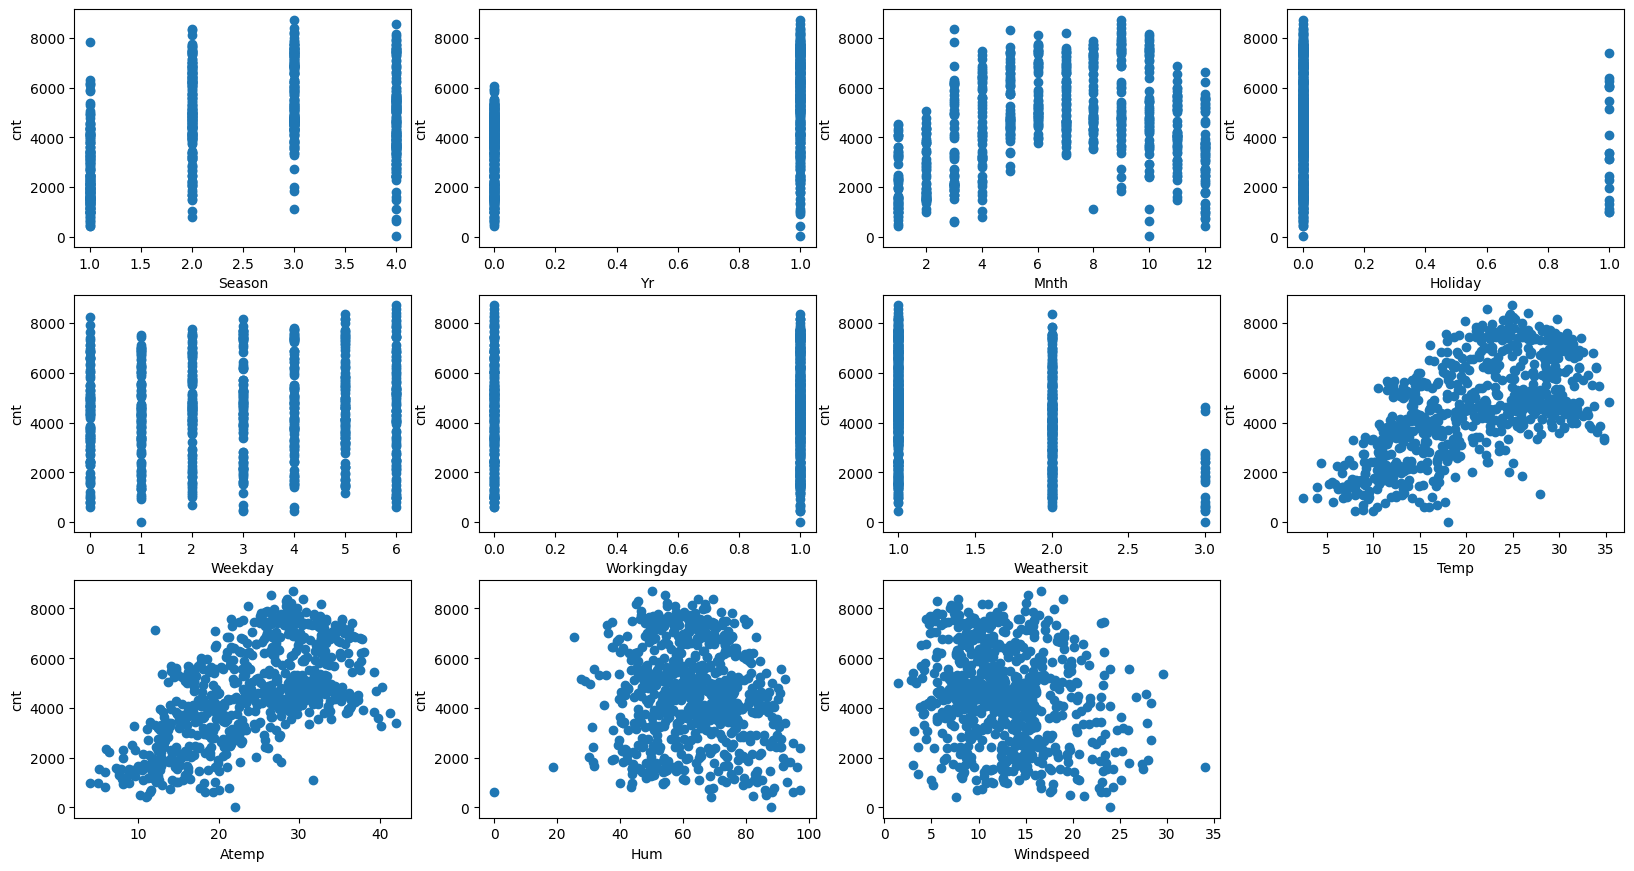

In [ ]:
plt.figure(figsize=(20,10.5))
plot_count = 1
for feature in list(df.columns)[:-1]:
    plt.subplot(3,4,plot_count)
    plt.scatter(df[feature],df['cnt'])
    plt.xlabel(feature.replace('_',' ').title())
    plt.ylabel('cnt')
    plot_count += 1
plt.show()

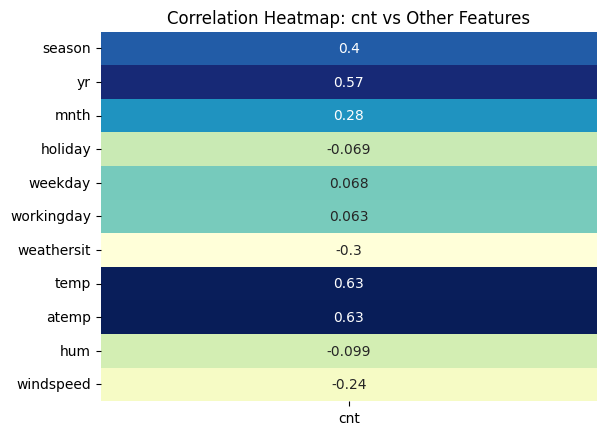

In [ ]:
df_cnt = df['cnt']
df_notcnt = df.drop(['cnt'], axis=1)
correlation_matrix = df_notcnt.corrwith(df_cnt)

# Data frame
df_corr = pd.DataFrame({'cnt': correlation_matrix})

# Heatmap
sns.heatmap(df_corr, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Correlation Heatmap: cnt vs Other Features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop(['cnt'], axis=1)
y = df['cnt']


In [ ]:
#tain testing model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 762570.6257386539
R² Score: 0.7944864051538516


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=50, random_state=42)
model3.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
y_pred = model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)
print('R² Score:', r2)

Mean Squared Error (MSE): 383567.46266484016
R² Score: 0.8966281607793232


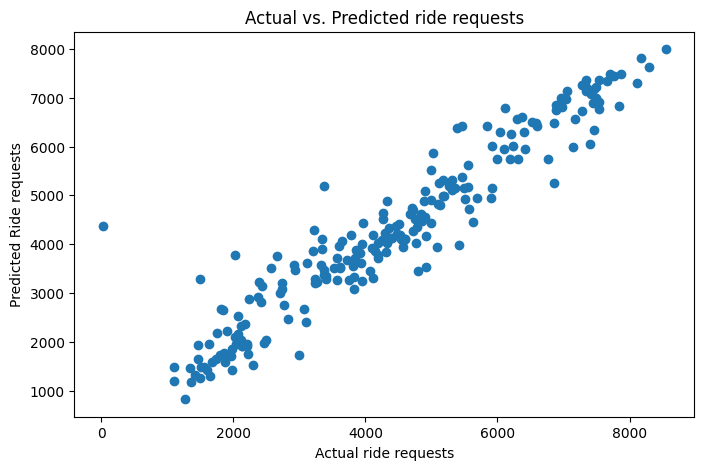

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual ride requests')
plt.ylabel('Predicted Ride requests')
plt.title('Actual vs. Predicted ride requests')
plt.show()


In [ ]:
future_data=pd.DataFrame({'season':[1],'yr':[0],'mnth':[2],'holiday':[0],
                          'weekday':[6],'workingday':[1],'weathersit':[1],'temp': [0],
                          'atemp': [0],'hum': [0],'windspeed': [0] })

In [ ]:
predicted_requests=model3.predict(future_data)
print(f"predicted ride requests at 3pm:  {predicted_requests[0]}")

predicted ride requests at 3pm:  1403.24
